# Notebook for Paper Comparison Flow

In this example, we will show you how to compare two papers from given markdown files using Google's models via uniflow.

### Before running the code

You will need to `uniflow` conda environment to run this notebook. You can set up the environment following the instruction: https://github.com/CambioML/uniflow/tree/main#installation.

Next, you will need a valid [Google API key](https://ai.google.dev/tutorials/setup) to run the code. Once you have the key, set it as the environment variable `GOOGLE_API_KEY` within a `.env` file in the root directory of this repository. For more details, see this [instruction](https://github.com/CambioML/uniflow/tree/main#api-keys)

### Update system path

In [1]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

## Import dependency

In [2]:
from dotenv import load_dotenv
from IPython.display import display

from uniflow.flow.client import TransformClient
from uniflow.flow.flow_factory import FlowFactory
from uniflow.flow.config  import TransformConfig
from uniflow.op.model.model_config import GoogleModelConfig

from uniflow.viz import Viz
from uniflow.op.prompt import Context

load_dotenv()

/opt/anaconda3/envs/uniflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

### Display the different flows

In [3]:
FlowFactory.list()

{'extract': ['ExtractHTMLFlow',
  'ExtractImageFlow',
  'ExtractIpynbFlow',
  'ExtractMarkdownFlow',
  'ExtractPDFFlow',
  'ExtractTxtFlow',
  'ExtractGmailFlow'],
 'transform': ['TransformAzureOpenAIFlow',
  'TransformComparisonGoogleFlow',
  'TransformComparisonOpenAIFlow',
  'TransformCopyFlow',
  'TransformGoogleFlow',
  'TransformGoogleMultiModalModelFlow',
  'TransformHuggingFaceFlow',
  'TransformLMQGFlow',
  'TransformOpenAIFlow'],
 'rater': ['RaterFlow']}

### Prepare Sample Prompts
Use preprocessed raw markdowns for now

In [4]:
with open(r"data/raw_input/paper_1_raw.md", 'r') as file:
    paper_1_content = file.read()

with open(r"data/raw_input/paper_2_raw.md", 'r') as file:
    paper_2_content = file.read()

raw_context_input = [
    paper_1_content,
    paper_2_content,
]
raw_context_input

['# The Impact of Artificial Intelligence on Healthcare: A Review\n\n## Abstract\nArtificial intelligence (AI) has emerged as a transformative technology in healthcare, offering opportunities to improve patient outcomes, streamline processes, and enhance decision-making. This paper provides an overview of the current state of AI in healthcare, explores its applications, benefits, challenges, and future prospects.\n\n## Introduction\nIn recent years, artificial intelligence has gained significant traction across various industries, and healthcare is no exception. With advancements in machine learning, natural language processing, and robotics, AI has the potential to revolutionize healthcare delivery, diagnosis, treatment, and management. This paper aims to delve into the role of AI in healthcare, highlighting its implications, challenges, and future directions.\n\n## Background\nThe integration of AI into healthcare systems has been facilitated by the exponential growth of data, couple

Next, for the given raw text strings `raw_context_input` above, we convert them to the `Context` class to be processed by `uniflow`.

### Run Comparison Flow
In this example, we use the base `Config` defaults with the GoogleModelConfig to generate questions and answers.

In [5]:
data = [[Context(Context=raw_context_input[0]), Context(Context=raw_context_input[1])]]

config = TransformConfig(
    flow_name="TransformComparisonGoogleFlow",
    model_config=GoogleModelConfig()
)
client = TransformClient(config)

In [6]:
output = client.run(data)

100%|██████████| 1/1 [01:22<00:00, 82.22s/it]

1-Abstract
**Similarities:**

* Both papers discuss the potential benefits of AI in healthcare.
* Both papers acknowledge the ethical concerns associated with AI in healthcare.
* Both papers emphasize the importance of collaboration between researchers, healthcare professionals, and policymakers in the integration of AI into healthcare.

**Differences:**

* **Topic:** Paper A focuses specifically on the applications of AI in healthcare, while Paper B focuses on the impact of renewable energy adoption on global carbon emissions.
* **Scope:** Paper A provides a comprehensive overview of the current landscape of AI in healthcare, while Paper B presents a specific study on the correlation between renewable energy adoption and carbon emissions.
* **Methodology:** Paper A does not explicitly mention the methodology used in the research, while Paper B describes the data sources and statistical models employed in the study.
* **Findings:** Paper A discusses the potential benefits of AI in vari

### View the output

Let's take a look of the generated output.

In [9]:
comparison = output[0]['output']
label_list = ["1-Abstract", "2-Introduction", "3-Background", "4-Approach", "5-Experiment or Result", "6-Conclusion or Future work"]

for i in range(len(comparison)):
    for context in comparison[i]:
        print(label_list[i])
        print(context.context[0] + '\n')

1-Abstract
**Similarities:**

* Both papers discuss the potential benefits of AI in healthcare.
* Both papers acknowledge the ethical concerns associated with AI in healthcare.
* Both papers emphasize the importance of collaboration between researchers, healthcare professionals, and policymakers in the integration of AI into healthcare.

**Differences:**

* **Topic:** Paper A focuses specifically on the applications of AI in healthcare, while Paper B focuses on the impact of renewable energy adoption on global carbon emissions.
* **Scope:** Paper A provides a comprehensive overview of the current landscape of AI in healthcare, while Paper B presents a specific study on the correlation between renewable energy adoption and carbon emissions.
* **Methodology:** Paper A does not explicitly mention the methodology used in the research, while Paper B describes the data sources and statistical models employed in the study.
* **Findings:** Paper A discusses the potential benefits of AI in vari

### Plot model flow graph
Here, we visualize the model flow graph for the `ModelFlow`.

In [9]:
graph = Viz.to_digraph(output[0]['root'])

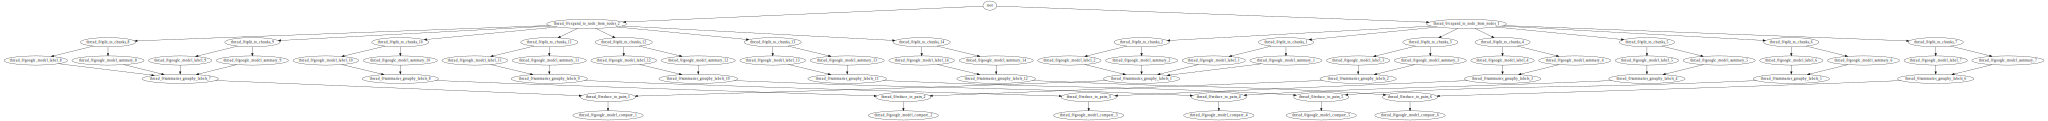

In [10]:
display(graph)